In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
def add_proportion(group):
    # adds the proportion of a name for a given year
    births = group.births.astype(float)
    group['prop'] = (births/births.sum()) * 100

    return group

In [3]:
def get_top_100(group):
    return group.sort_values(by='prop', ascending=False)[:100]

In [12]:
pieces = []

# Open the text file for each year, append it to a list
for year in range(1880, 2011):
    path = 'ch02/names/yob%d.txt' % year
    frame = pd.read_csv(path, names=['name', 'sex', 'births'])
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single data frame, add the prop % column
names = pd.concat(pieces, ignore_index=True)
girls = names[names.sex == 'F']
boys = names[names.sex == 'M']
girls = girls.groupby(['year', 'sex']).apply(add_proportion)
boys = boys.groupby(['year', 'sex']).apply(add_proportion)

girls[:]


In [5]:
# Grouping data by the top 100 proportionally per year

# grouped = names.groupby(['year', 'sex'])
# top_100 = grouped.apply(get_top_100)
# top_100.index = np.arange(len(top_100))
# boys = top_100[top_100['sex'] == 'M']
# girls = top_100[top_100['sex'] == 'F']

In [6]:
# Let's find the most popular girls names in 1880

print names[0:10]

# Most popular in 2010

print names[1656946:1656956]

        name sex  births  year      prop
0       Mary   F    7065  1880  7.764334
1       Anna   F    2604  1880  2.861759
2       Emma   F    2003  1880  2.201268
3  Elizabeth   F    1939  1880  2.130933
4     Minnie   F    1746  1880  1.918829
5   Margaret   F    1578  1880  1.734199
6        Ida   F    1472  1880  1.617707
7      Alice   F    1414  1880  1.553966
8     Bertha   F    1320  1880  1.450661
9      Sarah   F    1288  1880  1.415493
             name sex  births  year      prop
1656946  Isabella   F   22731  2010  1.292261
1656947    Sophia   F   20477  2010  1.164121
1656948      Emma   F   17179  2010  0.976629
1656949    Olivia   F   16860  2010  0.958494
1656950       Ava   F   15300  2010  0.869807
1656951     Emily   F   14172  2010  0.805680
1656952   Abigail   F   14124  2010  0.802952
1656953   Madison   F   13070  2010  0.743032
1656954     Chloe   F   11656  2010  0.662645
1656955       Mia   F   10541  2010  0.599258


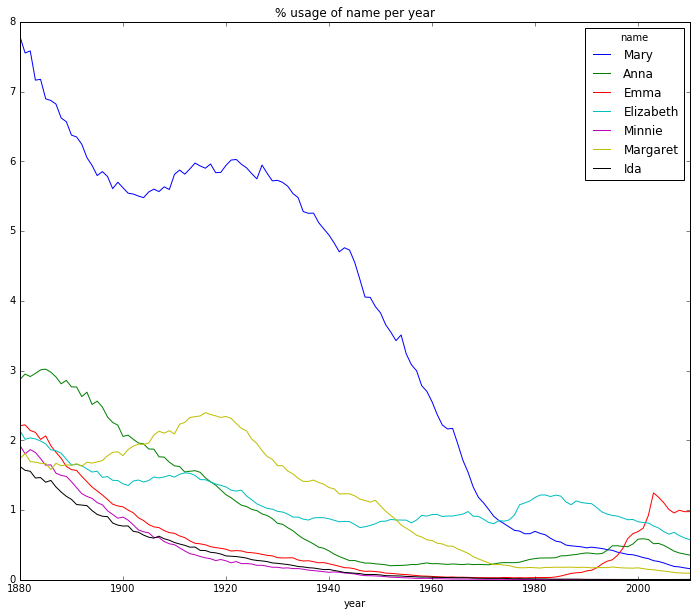

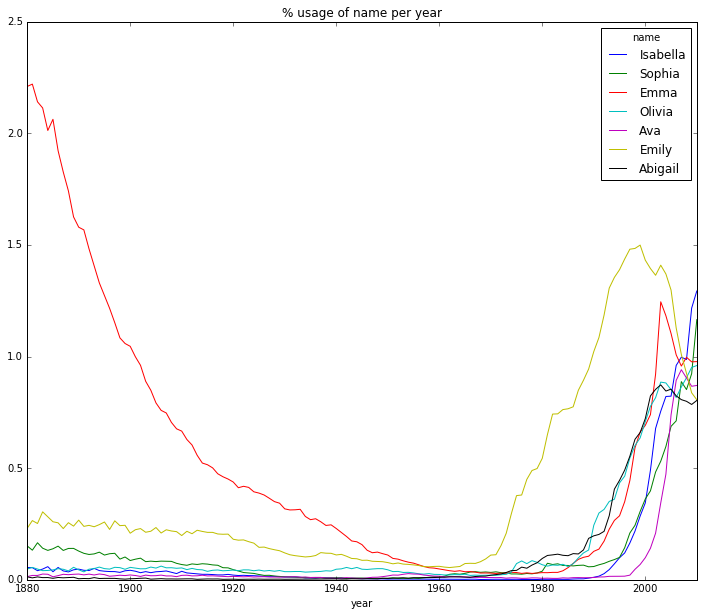

In [7]:
# Aggregates the data at the year and sex level vs total births (absolute numbers)
# total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)

# Aggregates data at year/sex by proportion 
total_births = names.pivot_table('prop', index='year', columns='name', aggfunc=sum)


subset1880 = total_births[['Mary','Anna','Emma','Elizabeth','Minnie','Margaret','Ida']]
subset1880.plot(subplots=False, figsize=(12,10), grid=False, title="% usage of name per year")

subset2010 = total_births[['Isabella','Sophia','Emma','Olivia','Ava','Emily','Abigail']]
subset2010.plot(subplots=False, figsize=(12,10), grid=False, title="% usage of name per year")



In [8]:
# I want to find what were the most popular names, ever. Mary is clearly dominating here...

grouped = names.groupby(['year', 'sex', 'name'])
top_100 = grouped.apply(get_top_100)

top_100[:10]

KeyboardInterrupt: 